Loading Model

In [2]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\roari\Downloads\Fraud\Fraud Datasheet.csv"
data = pd.read_csv(file_path)

In [23]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [25]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
# Display dataset information
print("Dataset Information:")
print(data.info())
print("\n")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None




In [6]:
# Display the shape of the dataset
print(f"Dataset Shape: {data.shape}\n")

Dataset Shape: (6362620, 11)



In [10]:
# Check for null values
null_values = data.isnull().sum()
null_values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
# Display column names
data.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [16]:
# Count of each column
print("Count of Each Column:")
print(data.count())
print("\n")

Count of Each Column:
step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64




In [18]:
# Unique labels or counts for each column
unique_counts = data.nunique()
print("Unique Counts for Each Column:")
print(unique_counts)
print("\n")

Unique Counts for Each Column:
step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64




In [20]:
# Display unique labels for categorical columns
for column in data.select_dtypes(include=['object']).columns:
    print(f"Unique Labels in {column}:")
    print(data[column].unique())
    print("\n")

Unique Labels in type:
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


Unique Labels in nameOrig:
['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


Unique Labels in nameDest:
['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']




Description of features

Correlation matrix

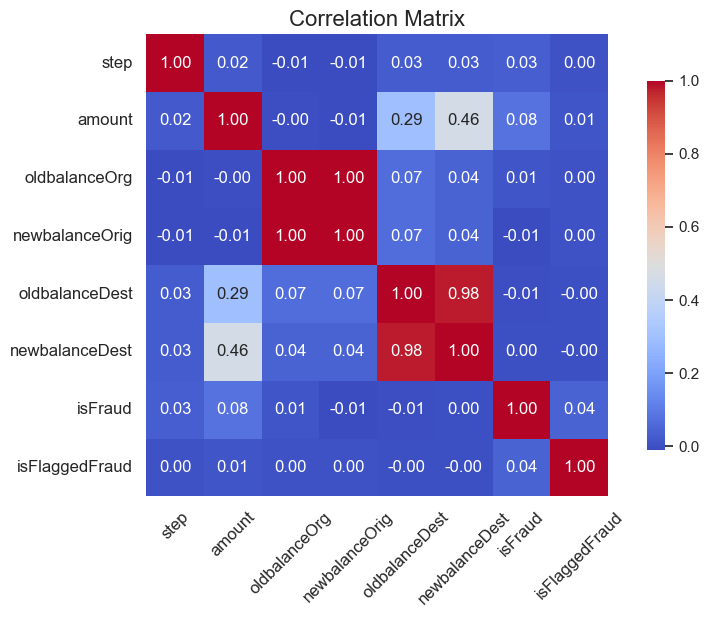

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'data' loaded previously

# Select only the numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the plot
plt.show()

Checking Multicollinearity

Distribution of Fraud

LABEL ENCODING

In [57]:
# Check data types
print(data.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [59]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid changing the original
data_encoded = data.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = data_encoded.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for column in categorical_columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# Check the updated data types
print(data_encoded.dtypes)

step                int64
type                int32
amount            float64
nameOrig            int32
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int32
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [61]:
data_encoded

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


Checking Multicollinearity

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a DataFrame to hold VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = data_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(data_encoded.values, i) for i in range(data_encoded.shape[1])]

print(vif_data)

           feature         VIF
0             step    2.791610
1             type    4.467405
2           amount    4.149312
3         nameOrig    2.764234
4    oldbalanceOrg  576.803777
5   newbalanceOrig  582.709128
6         nameDest    3.300975
7   oldbalanceDest   73.349937
8   newbalanceDest   85.005614
9          isFraud    1.195305
10  isFlaggedFraud    1.002587


Multicollinear features are combined as total

In [74]:
import pandas as pd

# Assuming data_encoded is your DataFrame
# Replace 'data_encoded' with your actual DataFrame variable name if different

# Step 1: Create new columns for actual amounts
data_encoded['Actual_amount_orig'] = data_encoded.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'], axis=1)
data_encoded['Actual_amount_dest'] = data_encoded.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'], axis=1)

# Step 2: Create a new column for the transaction path
data_encoded['TransactionPath'] = data_encoded.apply(lambda x: str(x['nameOrig']) + str(x['nameDest']), axis=1)

# Step 3: Dropping specified columns
data_encoded = data_encoded.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step', 'nameOrig', 'nameDest'], axis=1)

# Display the updated DataFrame
print(data_encoded.head())

   type    amount  isFraud  isFlaggedFraud  Actual_amount_orig  \
0     3   9839.64        0               0             9839.64   
1     3   1864.28        0               0             1864.28   
2     4    181.00        1               0              181.00   
3     1    181.00        1               0              181.00   
4     3  11668.14        0               0            11668.14   

   Actual_amount_dest     TransactionPath  
0                 0.0   757869.01662094.0  
1                 0.0  2188998.01733924.0  
2                 0.0   1002156.0439685.0  
3             21182.0   5828262.0391696.0  
4                 0.0   3445981.0828919.0  


In [76]:
data_encoded.head(5)

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath
0,3,9839.64,0,0,9839.64,0.0,757869.01662094.0
1,3,1864.28,0,0,1864.28,0.0,2188998.01733924.0
2,4,181.00,1,0,181.00,0.0,1002156.0439685.0
3,1,181.00,1,0,181.00,21182.0,5828262.0391696.0
4,3,11668.14,0,0,11668.14,0.0,3445981.0828919.0


Checking Muticollinearity again

In [81]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have your data in a DataFrame called data_encoded
# Select only the numeric columns for VIF calculation
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame to hold the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_cols
vif_data["VIF"] = [variance_inflation_factor(data_encoded[numeric_cols].values, i) for i in range(len(numeric_cols))]

# Display the VIF values
print(vif_data)

              Feature       VIF
0              amount  3.637288
1             isFraud  1.175736
2      isFlaggedFraud  1.002478
3  Actual_amount_orig  1.202228
4  Actual_amount_dest  3.686456


VIF scores suggest that multicollinearity is not a significant problem in my dataset.

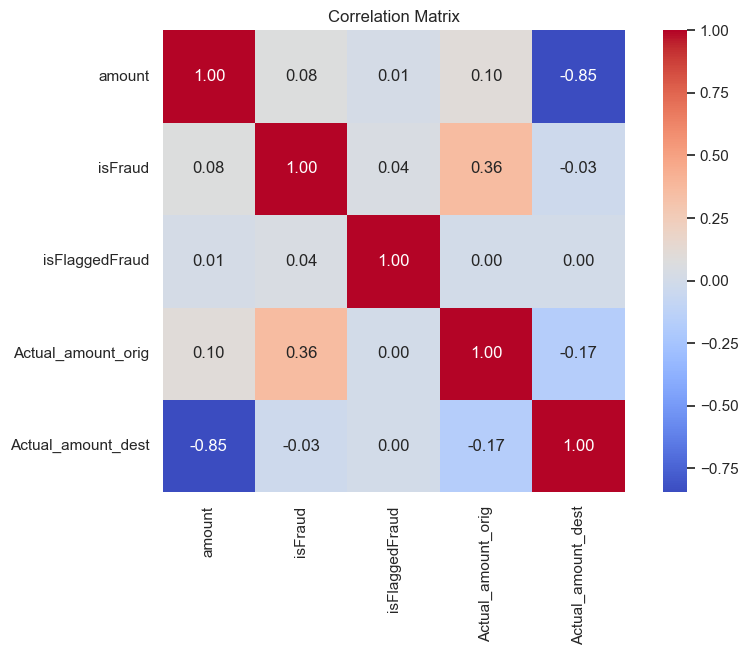

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_encoded is your DataFrame
# Replace 'data_encoded' with your actual DataFrame name if different

# Select numeric features for the correlation matrix
numeric_features = data_encoded[['amount', 'isFraud', 'isFlaggedFraud', 'Actual_amount_orig', 'Actual_amount_dest']]

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Set title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

the heatmap suggests that the variable amount is strongly negatively correlated with Actual_amount_dest, which might indicate that the actual amount transferred is often different from the original amount specified. The moderate positive correlation between isFraud and Actual_amount_orig could suggest that fraudulent transactions tend to involve larger original amounts.

I will keep both the features and i will monitor effect if i will remove one

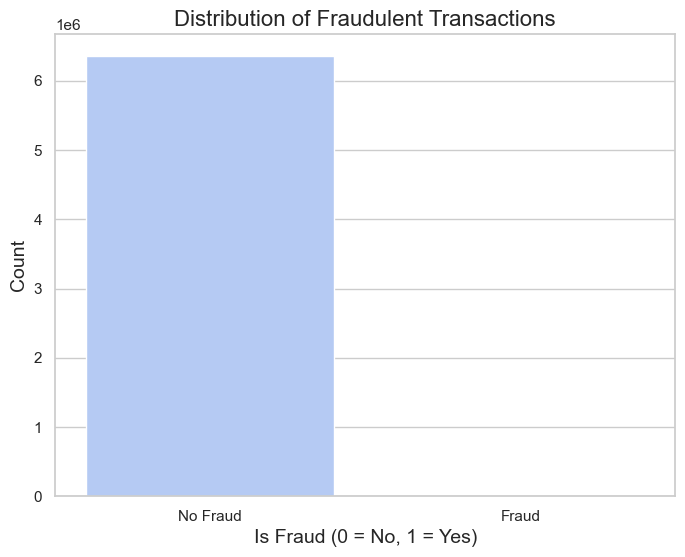

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_encoded is your DataFrame
# Replace 'data_encoded' with your actual DataFrame name if different

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a count plot for the isFraud variable
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=data_encoded, palette='coolwarm')

# Set title and labels
plt.title('Distribution of Fraudulent Transactions', fontsize=16)
plt.xlabel('Is Fraud (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.xticks(ticks=[0, 1], labels=['No Fraud', 'Fraud'])
plt.show()

In [96]:
# Count the occurrences of each class in isFraud
fraud_counts = data_encoded['isFraud'].value_counts()
print(fraud_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [101]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [107]:
import pandas as pd

# Assuming data_encoded is your DataFrame
# Replace 'data_encoded' with your actual DataFrame name if different

# Separate the majority and minority classes
majority_class = data_encoded[data_encoded['isFraud'] == 0]
minority_class = data_encoded[data_encoded['isFraud'] == 1]

# Oversample the minority class
minority_class_oversampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
data_balanced = pd.concat([majority_class, minority_class_oversampled])

# Shuffle the balanced dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the new distribution
print(data_balanced['isFraud'].value_counts())

isFraud
0    6354407
1    6354407
Name: count, dtype: int64


In [111]:
data_balanced.shape

(12708814, 7)

In [119]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12708814 entries, 0 to 12708813
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   type                int32  
 1   amount              float64
 2   isFraud             int64  
 3   isFlaggedFraud      int64  
 4   Actual_amount_orig  float64
 5   Actual_amount_dest  float64
 6   TransactionPath     object 
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 630.2+ MB


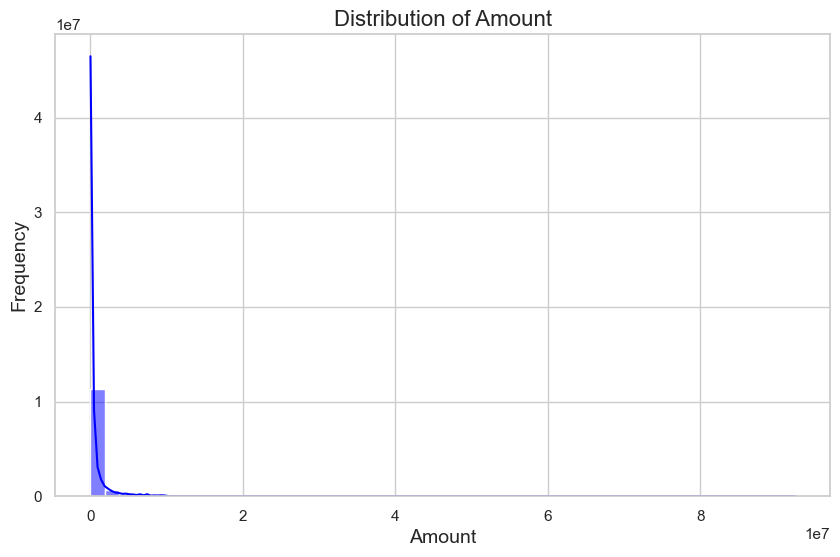

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_balanced is your balanced DataFrame
# Replace 'data_balanced' with your actual DataFrame name if different

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for the amount variable
plt.figure(figsize=(10, 6))
sns.histplot(data_balanced['amount'], bins=50, kde=True, color='blue')

# Set title and labels
plt.title('Distribution of Amount', fontsize=16)
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [125]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming data_balanced is your balanced DataFrame
# Replace 'data_balanced' with your actual DataFrame name if different

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler only to the 'amount' column
data_balanced['amount_scaled'] = scaler.fit_transform(data_balanced[['amount']])

# Verify the scaled values
print(data_balanced[['amount', 'amount_scaled']].head())

      amount  amount_scaled
0    5449.23      -0.438125
1  195538.51      -0.336345
2  244068.01      -0.310361
3   17365.96      -0.431744
4  768520.15      -0.029552


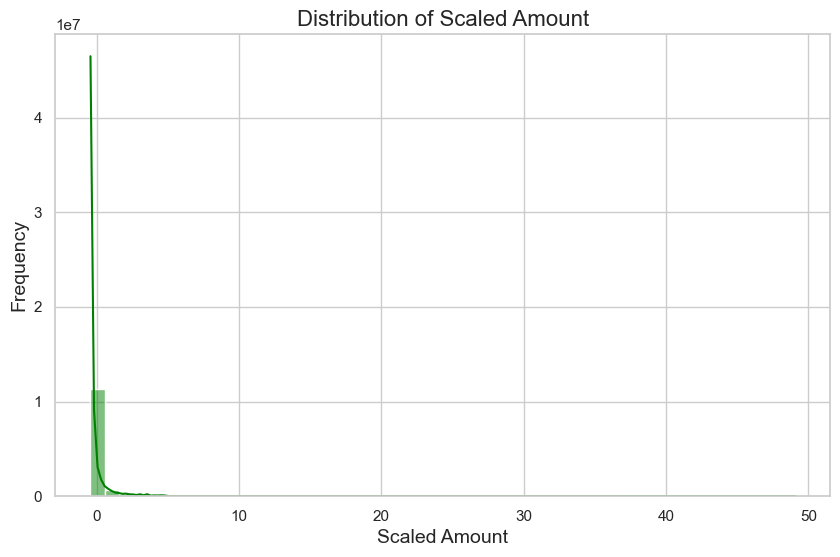

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for the scaled amount variable
plt.figure(figsize=(10, 6))
sns.histplot(data_balanced['amount_scaled'], bins=50, kde=True, color='green')

# Set title and labels
plt.title('Distribution of Scaled Amount', fontsize=16)
plt.xlabel('Scaled Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [131]:
# Convert all columns to numeric (where applicable), replacing invalid values with NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Check if any NaN values are introduced
print(X.isnull().sum())

# Drop rows with NaN values (optional) or handle them accordingly
X = X.dropna()

type                          0
amount                        0
isFlaggedFraud                0
Actual_amount_orig            0
Actual_amount_dest            0
TransactionPath        12708814
amount_log                    0
amount_standardized           0
amount_scaled                 0
dtype: int64


In [135]:
data_balanced = data_balanced.drop(columns=['TransactionPath'])

In [137]:
# Convert all columns to numeric (where applicable), replacing invalid values with NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Check if any NaN values are introduced
print(X.isnull().sum())

# Drop rows with NaN values (optional) or handle them accordingly
X = X.dropna()

type                   0
amount                 0
isFlaggedFraud         0
Actual_amount_orig     0
Actual_amount_dest     0
TransactionPath        0
amount_log             0
amount_standardized    0
amount_scaled          0
dtype: int64


Training Accuracy: 0.9086, Precision: 0.9585, Recall: 0.8543, F1: 0.9034
Testing Accuracy: 0.9085, Precision: 0.9586, Recall: 0.8539, F1: 0.9032


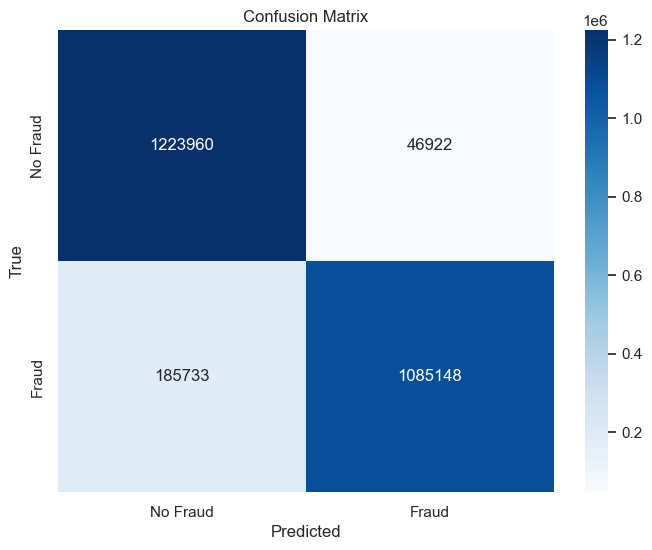

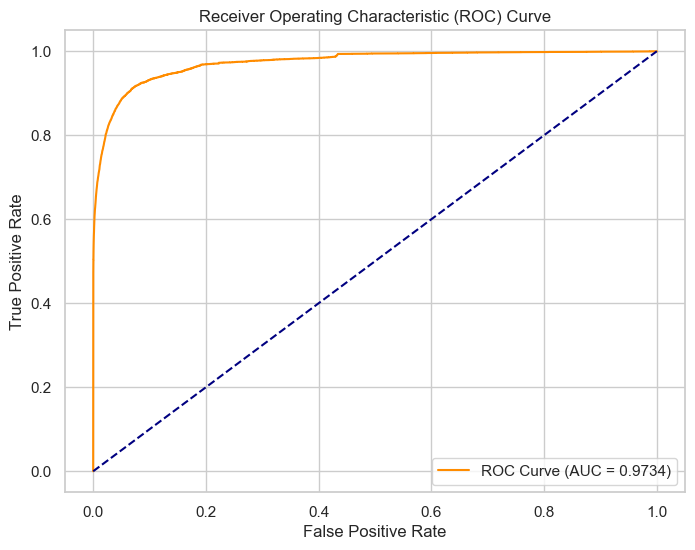


Model Evaluation Summary:
      Metric  Training Set  Testing Set
0   Accuracy      0.908636     0.908467
1  Precision      0.958492     0.958552
2     Recall      0.854267     0.853855
3   F1 Score      0.903383     0.903179


In [139]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_balanced is your DataFrame
# Replace 'data_balanced' with your actual DataFrame name if different

# Features and target
X = data_balanced.drop(columns=['isFraud'])  # Exclude 'isFraud' column from features
y = data_balanced['isFraud']  # 'isFraud' is the target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions for training and testing sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# ----------------------
# Model Evaluation
# ----------------------

# Calculate accuracy, precision, recall, and F1 score for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Training Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

# ----------------------
# Confusion Matrix
# ----------------------

# Confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ----------------------
# ROC Curve and AUC
# ----------------------

# Get predicted probabilities
y_test_probs = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# ----------------------
# Summarize Training and Testing Results
# ----------------------
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training Set': [train_accuracy, train_precision, train_recall, train_f1],
    'Testing Set': [test_accuracy, test_precision, test_recall, test_f1]
})

print("\nModel Evaluation Summary:")
print(results)

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd

# Specify the path to your dataset
dataset_path = r"C:\Users\roari\Downloads\Fraud\Fraud Datasheet.csv"

# Load the dataset
fraud_data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset to confirm it loaded correctly
print(fraud_data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
fraud_data = pd.read_csv(dataset_path, encoding='utf-8', sep=',')

In [5]:
fraud_data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# Step 1: Drop the 'step' column
new_df = fraud_data.drop(columns=['step'])

# Step 2: Calculate 'Actual_amount_orig' and 'Actual_amount_dest'
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'], axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'], axis=1)

# Step 3: Create the 'TransactionPath' column
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'], axis=1)

# Step 4: Dropping unnecessary columns
new_df = new_df.drop(columns=['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig', 'nameDest'])

# Display the first few rows of the new DataFrame
print(new_df.head())

       type    amount  isFraud  isFlaggedFraud  Actual_amount_orig  \
0   PAYMENT   9839.64        0               0             9839.64   
1   PAYMENT   1864.28        0               0             1864.28   
2  TRANSFER    181.00        1               0              181.00   
3  CASH_OUT    181.00        1               0              181.00   
4   PAYMENT  11668.14        0               0            11668.14   

   Actual_amount_dest         TransactionPath  
0                 0.0  C1231006815M1979787155  
1                 0.0  C1666544295M2044282225  
2                 0.0   C1305486145C553264065  
3             21182.0     C840083671C38997010  
4                 0.0  C2048537720M1230701703  


In [9]:
new_df.head(5)

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath
0,PAYMENT,9839.64,0,0,9839.64,0.0,C1231006815M1979787155
1,PAYMENT,1864.28,0,0,1864.28,0.0,C1666544295M2044282225
2,TRANSFER,181.00,1,0,181.00,0.0,C1305486145C553264065
3,CASH_OUT,181.00,1,0,181.00,21182.0,C840083671C38997010
4,PAYMENT,11668.14,0,0,11668.14,0.0,C2048537720M1230701703


In [11]:
# Count null values in each column
null_counts = new_df.isnull().sum()

# Display the count of null values
print(null_counts)

type                  0
amount                0
isFraud               0
isFlaggedFraud        0
Actual_amount_orig    0
Actual_amount_dest    0
TransactionPath       0
dtype: int64


In [13]:
# Dropping the 'TransactionPath' column
new_df = new_df.drop(columns=['TransactionPath'])

In [15]:
new_df.head(5)

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest
0,PAYMENT,9839.64,0,0,9839.64,0.0
1,PAYMENT,1864.28,0,0,1864.28,0.0
2,TRANSFER,181.00,1,0,181.00,0.0
3,CASH_OUT,181.00,1,0,181.00,21182.0
4,PAYMENT,11668.14,0,0,11668.14,0.0


In [17]:
new_df.tail(5)

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest
6362615,CASH_OUT,339682.13,1,0,339682.13,-339682.13
6362616,TRANSFER,6311409.28,1,0,6311409.28,0.00
6362617,CASH_OUT,6311409.28,1,0,6311409.28,-6311409.27
6362618,TRANSFER,850002.52,1,0,850002.52,0.00
6362619,CASH_OUT,850002.52,1,0,850002.52,-850002.52


C:\Users\roari\AppData\Local\Temp\ipykernel_5932\2885500572.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='isFraud', palette='Set2')


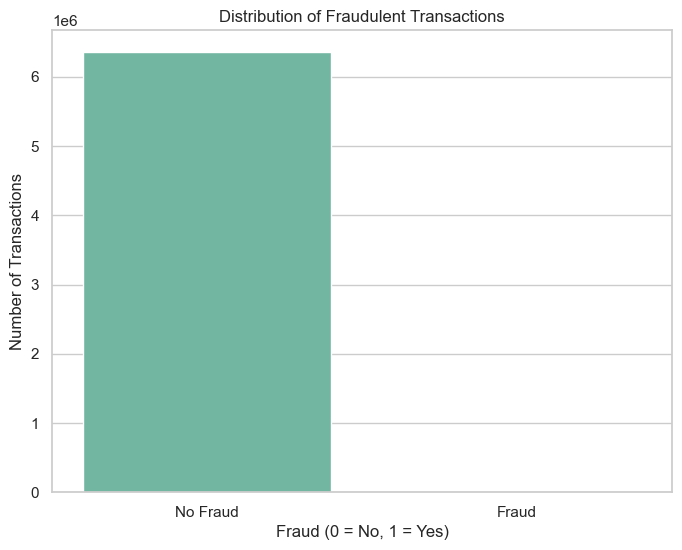

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualizations
sns.set(style="whitegrid")

# Create a histogram for the distribution of fraud (0 vs 1)
plt.figure(figsize=(8, 6))
sns.countplot(data=new_df, x='isFraud', palette='Set2')

# Add titles and labels
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['No Fraud', 'Fraud'])

# Show the plot
plt.show()

In [21]:
# Counting the number of fraud and non-fraud transactions
fraud_count = new_df['isFraud'].value_counts()
print(fraud_count)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'type' column
new_df['type'] = label_encoder.fit_transform(new_df['type'])

# Display the updated DataFrame
print(new_df.head())

   type    amount  isFraud  isFlaggedFraud  Actual_amount_orig  \
0     3   9839.64        0               0             9839.64   
1     3   1864.28        0               0             1864.28   
2     4    181.00        1               0              181.00   
3     1    181.00        1               0              181.00   
4     3  11668.14        0               0            11668.14   

   Actual_amount_dest  
0                 0.0  
1                 0.0  
2                 0.0  
3             21182.0  
4                 0.0  


In [25]:
new_df.head(5)

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest
0,3,9839.64,0,0,9839.64,0.0
1,3,1864.28,0,0,1864.28,0.0
2,4,181.00,1,0,181.00,0.0
3,1,181.00,1,0,181.00,21182.0
4,3,11668.14,0,0,11668.14,0.0


In [31]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the 'amount' column
new_df['amount'] = scaler.fit_transform(new_df[['amount']])

# Display the updated DataFrame
print(new_df.head())

   type    amount  isFraud  isFlaggedFraud  Actual_amount_orig  \
0     3 -0.281560        0               0             9839.64   
1     3 -0.294767        0               0             1864.28   
2     4 -0.297555        1               0              181.00   
3     1 -0.297555        1               0              181.00   
4     3 -0.278532        0               0            11668.14   

   Actual_amount_dest  
0                 0.0  
1                 0.0  
2                 0.0  
3             21182.0  
4                 0.0  


Taking balanced observation for fraud

C:\Users\roari\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9067
Testing Accuracy: 0.9081
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6404
           1       0.95      0.86      0.90      6396

    accuracy                           0.91     12800
   macro avg       0.91      0.91      0.91     12800
weighted avg       0.91      0.91      0.91     12800

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1596
           1       0.96      0.85      0.90      1604

    accuracy                           0.91      3200
   macro avg       0.91      0.91      0.91      3200
weighted avg       0.91      0.91      0.91      3200



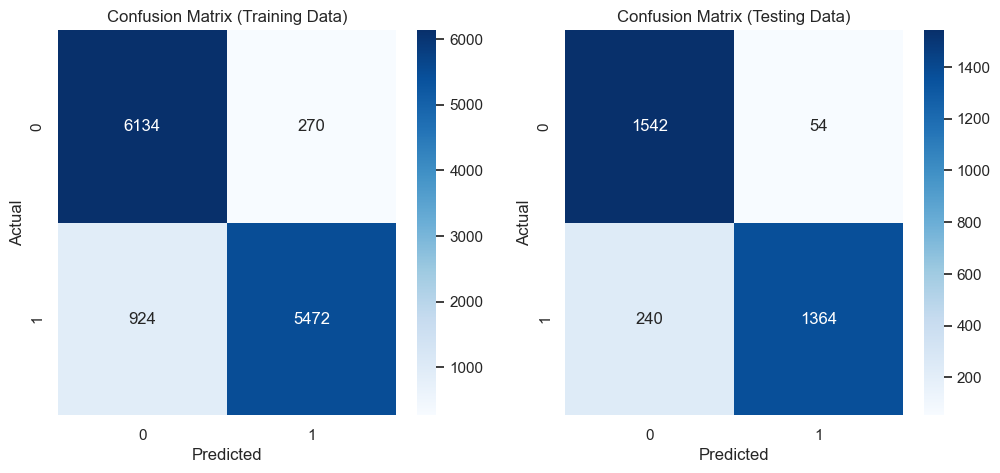

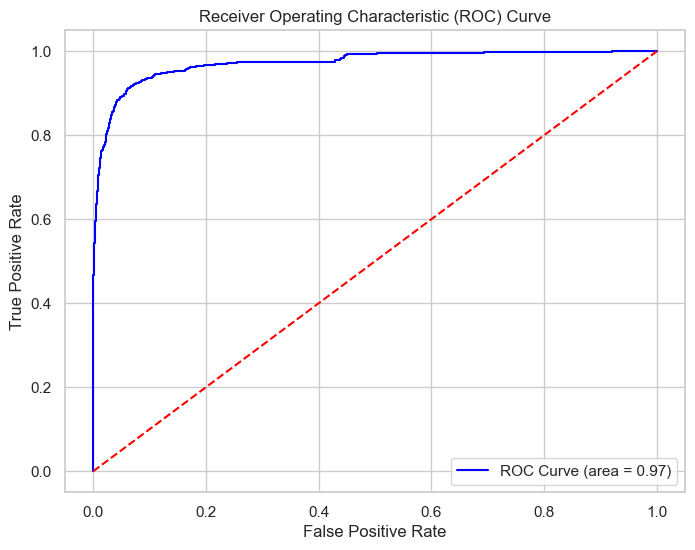

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter the Data
fraud_data = new_df[new_df['isFraud'] == 1].sample(n=8000, random_state=42)
non_fraud_data = new_df[new_df['isFraud'] == 0].sample(n=8000, random_state=42)

# Combine the two datasets
balanced_data = pd.concat([fraud_data, non_fraud_data])

# Step 2: Split the Data
X = balanced_data[['type', 'amount', 'isFlaggedFraud', 'Actual_amount_orig', 'Actual_amount_dest']]
y = balanced_data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Step 4: Evaluate the Model
# Training accuracy
train_accuracy = log_reg.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Testing accuracy
test_accuracy = log_reg.score(X_test, y_test)
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Classification report
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

print("Classification Report (Testing Data):")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Testing Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# ROC curve
y_test_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
